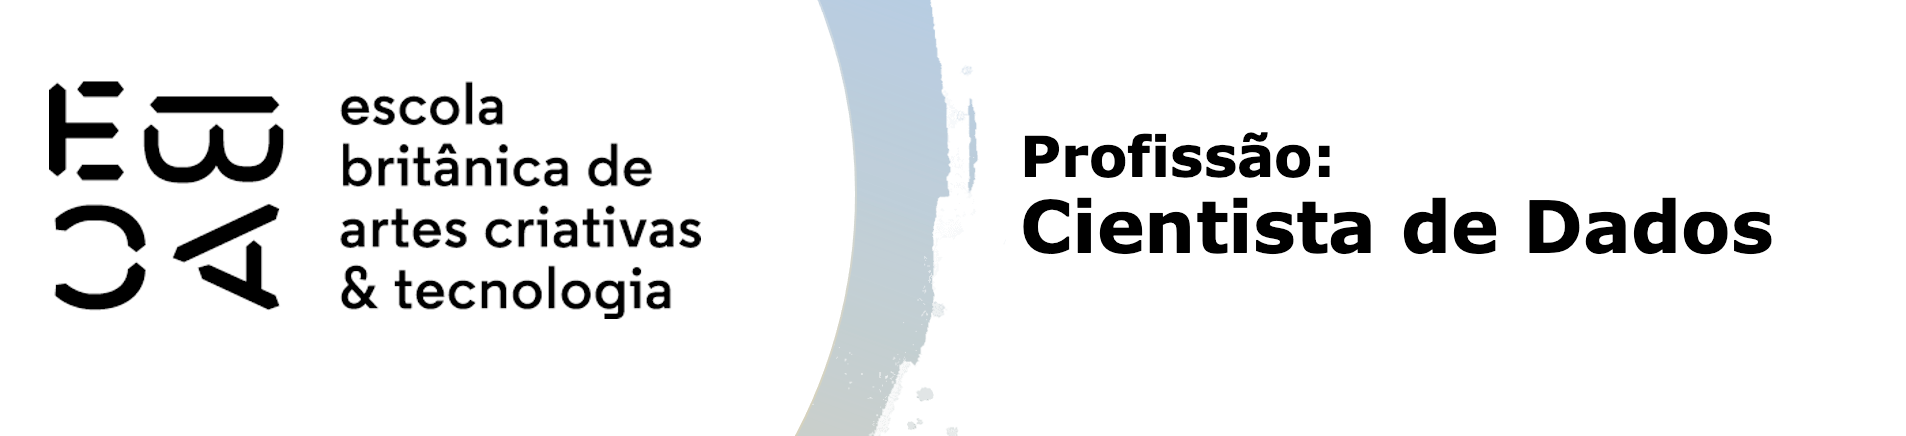

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.utils import column_or_1d

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [104]:
#o professor diz que tem uma das colunas da base é 'mês' e outra 'ano', mas, na verdade são 'semestre' e 'ano'.

df['Dia da semana'] = df['Data Emissão'].dt.day_name()

In [105]:
#Fim de semana = 1 / Dias úteis = 0

df['Fim de semana'] = df['Data Emissão'].dt.dayofweek // 5  

In [106]:
df['Dia do mês'] = df['Data Emissão'].dt.day

In [107]:
df['Trimestre'] = df['Data Emissão'].dt.quarter

In [108]:
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria,Dia da semana,Fim de semana,Dia do mês,Trimestre
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado,Friday,0,30,2
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto,Friday,0,30,2
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes,Friday,0,30,2
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes,Friday,0,30,2
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes,Friday,0,30,2


In [109]:
categorias = [5, 10, 20, 50]

In [110]:
for num_categorias in categorias:
    categoria_nome = f'Categoria_{num_categorias}'
    df[categoria_nome] = pd.qcut(df['Valor NF'], num_categorias, labels=False)

In [111]:
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,...,flag_credito,categoria,Dia da semana,Fim de semana,Dia do mês,Trimestre,Categoria_5,Categoria_10,Categoria_20,Categoria_50
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,...,0,Mercado,Friday,0,30,2,1,3,7,17
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,...,0,Auto posto,Friday,0,30,2,2,5,11,28
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,...,1,Restaurantes,Friday,0,30,2,1,3,7,19
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,...,1,Restaurantes,Friday,0,30,2,3,7,15,38
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,...,1,Restaurantes,Friday,0,30,2,3,7,15,39


In [112]:
categorias = ['Categoria_5', 'Categoria_10', 'Categoria_20', 'Categoria_50']

In [113]:
tabela_categorias = df.loc[:, categorias]

In [114]:
tabela_categorias

,Categoria_5,Categoria_10,Categoria_20,Categoria_50
0,1,3,7,17
1,2,5,11,28
2,1,3,7,19
3,3,7,15,38
4,3,7,15,39
...,...,...,...,...
187641,4,8,17,44
187642,4,9,18,46
187643,3,7,15,39
187644,2,5,10,26


df.dtypes

## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [115]:
# Estou filtrando uma parte do df igual o professor pediu no vídeo

df['Ano_Mês'] = df['Data Emissão'].dt.to_period('M')

In [116]:
df_filtrado = df[df['Ano_Mês'] >= '2020-01']

In [117]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86956 entries, 64598 to 187645
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CNPJ emit.           86956 non-null  object        
 1   Emitente             86956 non-null  object        
 2   No.                  86956 non-null  int64         
 3   Data Emissão         86956 non-null  datetime64[ns]
 4   Valor NF             86956 non-null  float64       
 5   Data Registro        86956 non-null  datetime64[ns]
 6   Créditos             86956 non-null  float64       
 7   Situação do Crédito  86956 non-null  category      
 8   Ano                  86956 non-null  int64         
 9   Semestre             86956 non-null  int64         
 10  Retorno              86000 non-null  float64       
 11  flag_credito         86956 non-null  int64         
 12  categoria            86956 non-null  object        
 13  Dia da semana        86956

In [ ]:
iv_dict = {}
iv_values = []
variavel_alvo = 'flag_credito'

for coluna in ['Valor NF', 'Créditos', 'Ano', 'Semestre', 'Retorno', 'categoria',
               'Dia da semana', 'Fim de semana', 'Dia do mês', 'Trimestre',
               'Categoria_5', 'Categoria_10', 'Categoria_20', 'Categoria_50']:
    iv = calcularIV(df_filtrado[coluna], df_filtrado[variavel_alvo])
    iv_dict[coluna] = iv
    iv_values.append(iv)

iv_df = pd.DataFrame({'Variavel': iv_dict.keys(), 'IV': iv_values})
iv_df = iv_df.sort_values('IV', ascending=False)

In [75]:
iv_df

,Variavel,IV
1,Créditos,14.888512
4,Retorno,12.588710
0,Valor NF,1.239474
5,categoria,0.278719
13,Categoria_50,0.132426
12,Categoria_20,0.092923
11,Categoria_10,0.066557
10,Categoria_5,0.043719
8,Dia do mês,0.015122
6,Dia da semana,0.005877


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

<span style="color:blue">Com base no cálculo do Information Value (IV), podemos observar que as variáveis "créditos" e "retorno" apresentam uma relação significativa com a variável alvo "flag_credito". 
    <br>A variável "Valor NF" mostra uma relação moderada, enquanto as demais categorias apresentam uma relação mais fraca com o alvo.</span>


## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

In [124]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86956 entries, 64598 to 187645
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CNPJ emit.           86956 non-null  object        
 1   Emitente             86956 non-null  object        
 2   No.                  86956 non-null  int64         
 3   Data Emissão         86956 non-null  datetime64[ns]
 4   Valor NF             86956 non-null  float64       
 5   Data Registro        86956 non-null  datetime64[ns]
 6   Créditos             86956 non-null  float64       
 7   Situação do Crédito  86956 non-null  category      
 8   Ano                  86956 non-null  int64         
 9   Semestre             86956 non-null  int64         
 10  Retorno              86000 non-null  float64       
 11  flag_credito         86956 non-null  int64         
 12  categoria            86956 non-null  object        
 13  Dia da semana        86956

<AxesSubplot:xlabel='Trimestre', ylabel='count'>

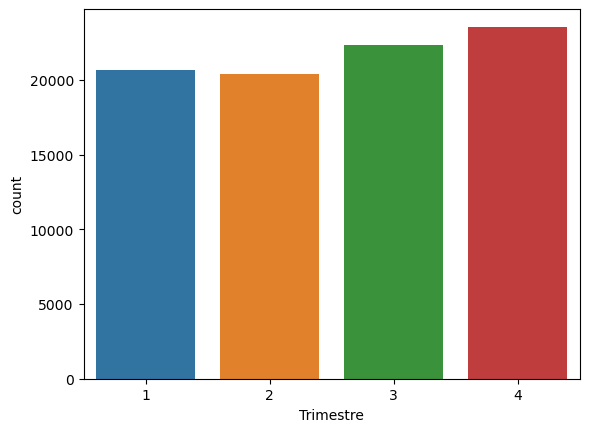

In [125]:
sns.countplot(data=df_filtrado, x="Trimestre")

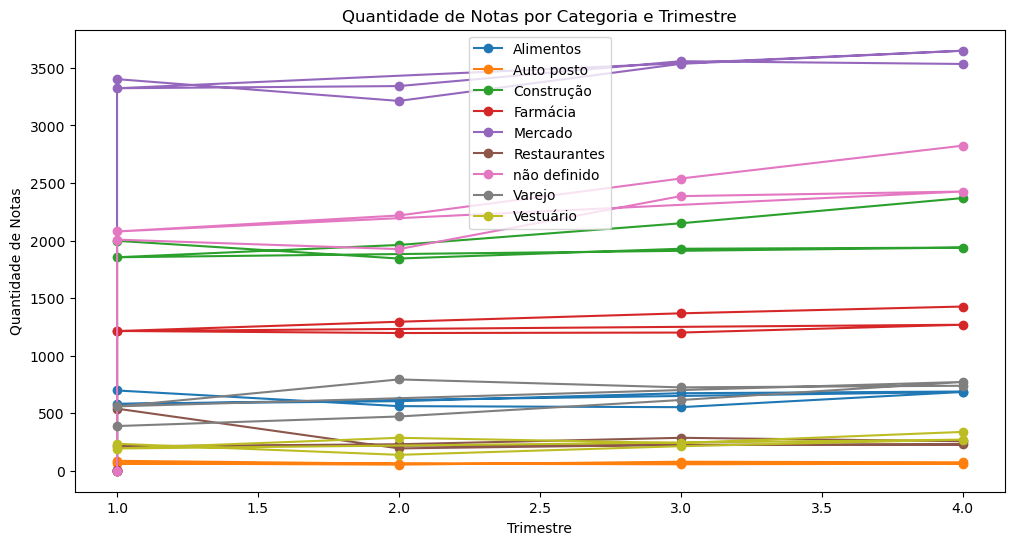

In [126]:
df_agrupado = df_filtrado.groupby([df_filtrado['Ano'], df_filtrado['Trimestre'], df_filtrado['categoria']])['No.'].count().reset_index()
df_agrupado.columns = ['Ano', 'Trimestre', 'Categoria', 'Quantidade']

fig, ax = plt.subplots(figsize=(12, 6))


for categoria in df_agrupado['Categoria'].unique():
    df_categoria = df_agrupado[df_agrupado['Categoria'] == categoria]
    label = f'{categoria}'
    ax.plot(df_categoria['Trimestre'], df_categoria['Quantidade'], marker='o', label=label)

ax.set_xlabel('Trimestre')
ax.set_ylabel('Quantidade de Notas')
ax.set_title('Quantidade de Notas por Categoria e Trimestre')
ax.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

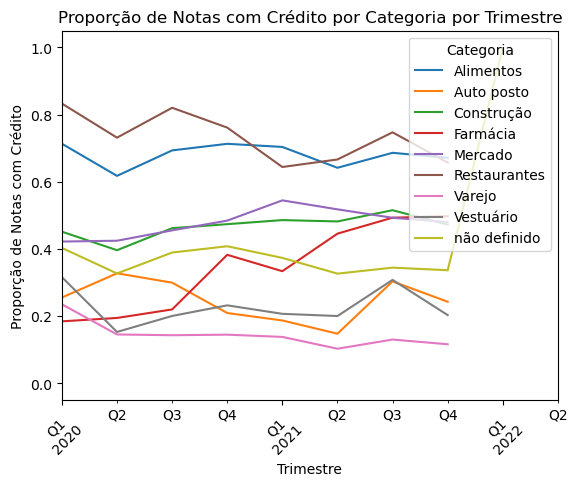

In [127]:
df_proporcao = df_filtrado.groupby([df_filtrado['Data Registro'].dt.to_period('Q'), 'categoria'])['flag_credito'].mean().unstack()

plt.figure(figsize=(10, 6))
df_proporcao.plot(kind='line')
plt.title('Proporção de Notas com Crédito por Categoria por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Proporção de Notas com Crédito')
plt.legend(title='Categoria')
plt.xticks(rotation=45)
plt.show()


## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

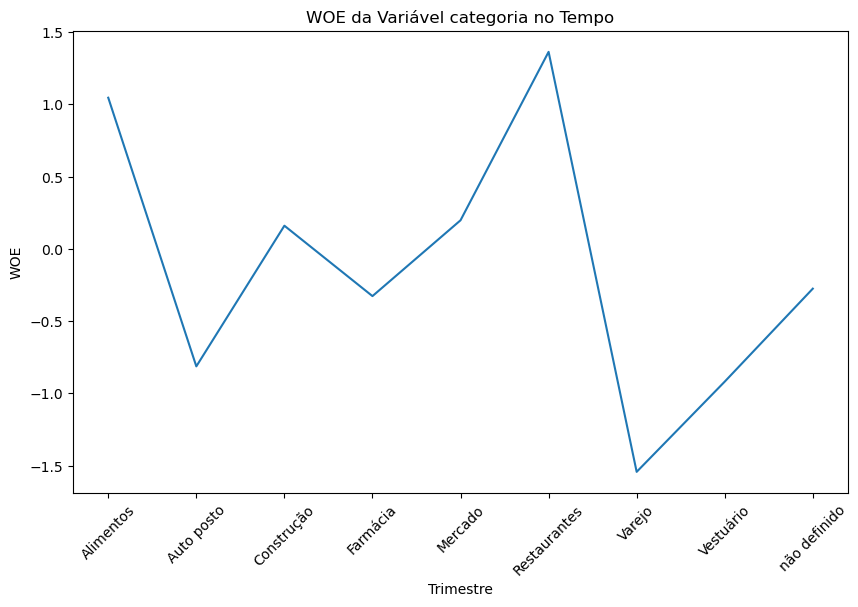

In [128]:
def calculate_woe_iv(df, feature, target):
    df = df.copy()
    df['target'] = column_or_1d(df[target])
    
    grouped = df.groupby(feature)['target'].agg(['count', 'sum'])
    grouped['non_event'] = grouped['count'] - grouped['sum']
    grouped['event_rate'] = grouped['sum'] / grouped['sum'].sum()
    grouped['non_event_rate'] = grouped['non_event'] / grouped['non_event'].sum()
    grouped['woe'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])
    
    plt.figure(figsize=(10, 6))
    grouped['woe'].plot(kind='line')
    plt.title('WOE da Variável {} no Tempo'.format(feature))
    plt.xlabel('Trimestre')
    plt.ylabel('WOE')
    plt.xticks(rotation=45)
    plt.show()

calculate_woe_iv(df_filtrado, 'categoria', 'flag_credito')

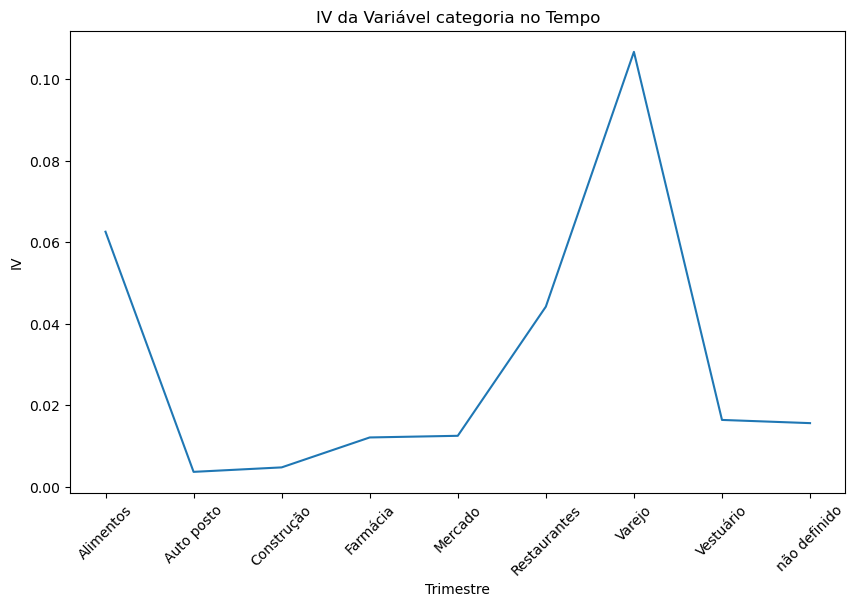

In [129]:
def calculate_iv(df, feature, target):
    df = df.copy()
    df['target'] = column_or_1d(df[target])
    
    grouped = df.groupby(feature)['target'].agg(['count', 'sum'])
    grouped['non_event'] = grouped['count'] - grouped['sum']
    grouped['event_rate'] = grouped['sum'] / grouped['sum'].sum()
    grouped['non_event_rate'] = grouped['non_event'] / grouped['non_event'].sum()
    grouped['iv'] = (grouped['event_rate'] - grouped['non_event_rate']) * np.log(grouped['event_rate'] / grouped['non_event_rate'])
    
    plt.figure(figsize=(10, 6))
    grouped['iv'].plot(kind='line')
    plt.title('IV da Variável {} no Tempo'.format(feature))
    plt.xlabel('Trimestre')
    plt.ylabel('IV')
    plt.xticks(rotation=45)
    plt.show()

calculate_iv(df_filtrado, 'categoria', 'flag_credito')

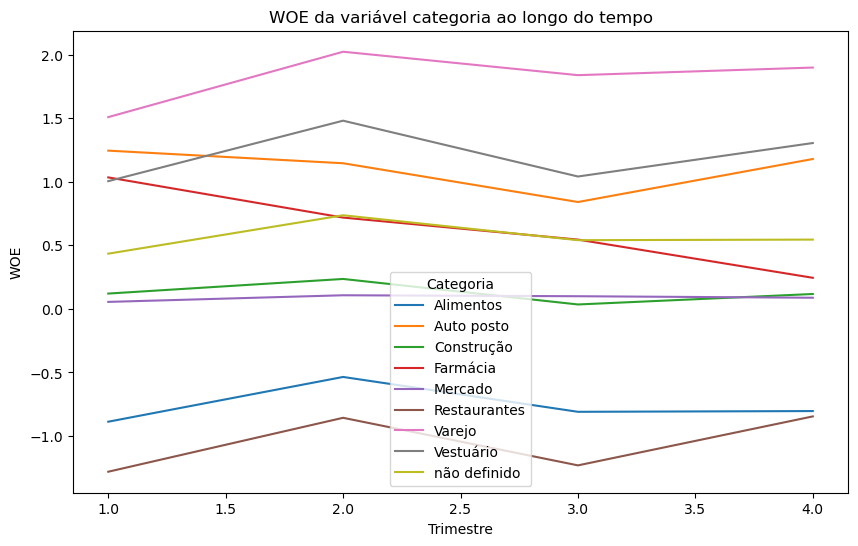

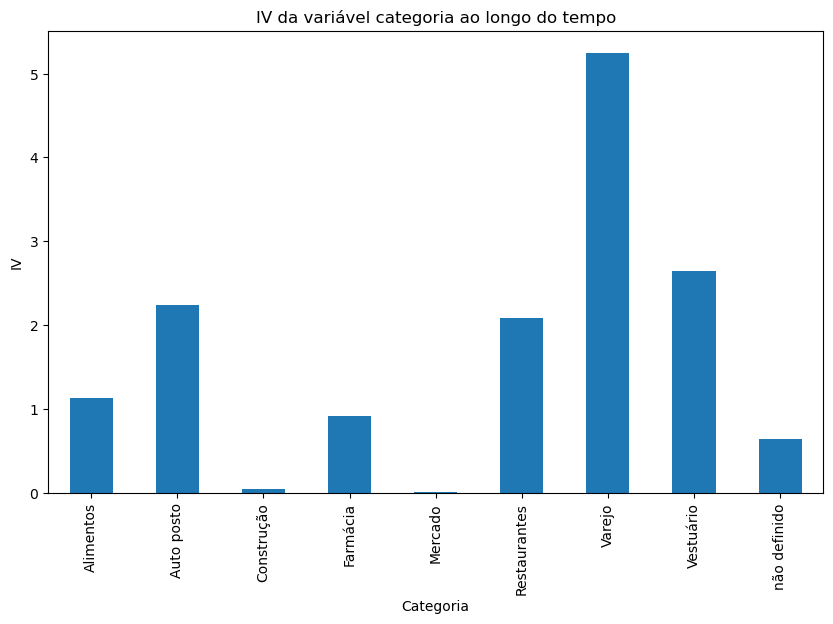

In [130]:
df_grouped = df_filtrado.groupby(['Trimestre', 'categoria'])

prop_with_credit = df_grouped['flag_credito'].mean()

prop_no_credit = 1 - prop_with_credit

woe = np.log(prop_no_credit / prop_with_credit)

iv = ((prop_no_credit - prop_with_credit) * woe).groupby('categoria').sum()

woe.unstack().plot(kind='line', figsize=(10, 6))
plt.xlabel('Trimestre')
plt.ylabel('WOE')
plt.title('WOE da variável categoria ao longo do tempo')
plt.legend(title='Categoria')
plt.show()

iv.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Categoria')
plt.ylabel('IV')
plt.title('IV da variável categoria ao longo do tempo')
plt.show()


## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

<span style="color:blue">Notamos que as categorias de Auto posto, Farmácia, Mercado, Restaurantes, Varejo e Vestuário apresentam valores positivos de WOE em pelo menos um trimestre. Isso sugere que essas categorias possuem uma maior proporção de notas com retornos maiores que zero em comparação com as outras categorias. Portanto, elas podem indicar uma maior propensão a conceder crédito a clientes com retornos positivos.</span>

<span style="color:blue">Ao analisar os valores de IV, podemos identificar as categorias que têm um impacto mais significativo na previsão da variável alvo. As categorias de Varejo, Restaurantes e Vestuário se destacam, apresentando valores mais altos de IV em comparação com as outras categorias. Isso indica que essas categorias têm uma influência mais significativa na previsão da variável alvo em relação às outras categorias.</span>

<span style="color:blue">Portanto, ao considerar tanto o WOE quanto o IV, podemos concluir que as categorias de Auto posto, Farmácia, Mercado, Restaurantes, Varejo e Vestuário parecem ter uma maior proporção de notas com retornos maiores que zero. Além disso, as categorias de Varejo, Restaurantes e Vestuário mostram uma maior importância na previsão da variável alvo.</span>

<span style="color:blue">Essas informações podem ser valiosas para a tomada de decisões relacionadas ao risco de crédito, pois destacam as categorias que têm maior probabilidade de conceder crédito a clientes com retornos positivos e também as categorias mais relevantes para a previsão da variável alvo.</span>